In [1]:
import cv2
from forwardE import wm_au_emb
import numpy as np
from matplotlib import pyplot as plt
from detectE import *
from recoveryE import stage1_recovery

In [2]:
image1 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\A_Data\\png\\Lena.png")
print(image1.shape)
w_image1 = wm_au_emb(image1,(13,17,19))
print("PSNR1",cv2.PSNR(image1,w_image1))

(512, 512, 3)
PSNR1 46.362559860369316


In [3]:
print("PSNR1",cv2.PSNR(image1,w_image1))

PSNR1 46.362559860369316


In [4]:
N = 512
t_all_image = np.random.randint(
    low=0, 
    high=256,
    size=(N, N, 3),
    dtype=np.uint8
)

In [5]:
tamper_image = w_image1.copy()
tamper_image[256-81:256+81,256-81:256+81,:]= t_all_image[256-81:256+81,256-81:256+81,:]
lv1_matrix = level_one_detection(tamper_image)
lv2_matrix = lv1_matrix.copy()
lv3_matrix = lv1_matrix.copy()
for channel in range(3):
    lv2_matrix[:,:,channel] = level_two_detection(lv1_matrix[:,:,channel])
    lv3_matrix[:,:,channel] = level_three_detection(lv2_matrix[:,:,channel])

In [6]:
r_img,lv4_BGR= stage1_recovery(t_img=tamper_image,key=(13,17,19))


In [7]:

print(cv2.PSNR(r_img,w_image1))


38.00510896690715


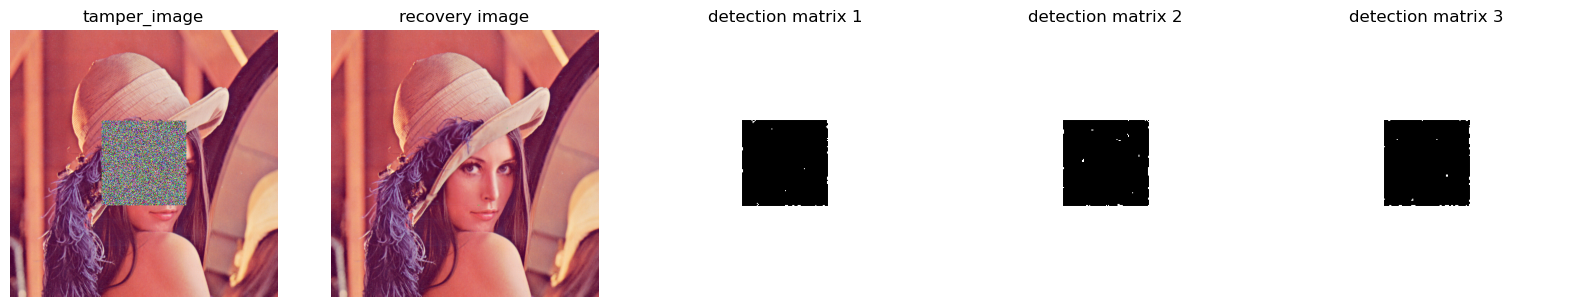

In [8]:
fig, axes = plt.subplots(1, 5,figsize = (20,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()
axes[4].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'recovery image')
axes[2].set_title(f'detection matrix 1')
axes[3].set_title(f'detection matrix 2')
axes[4].set_title(f'detection matrix 3')

axes[0].imshow(cv2.cvtColor(tamper_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(cv2.cvtColor(r_img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(lv3_matrix[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(lv3_matrix[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[4].imshow(lv3_matrix[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

In [9]:
mask1 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv4_BGR[int(i/2),int(j/2),0]:
            mask1[i,j] = 255
mask2 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv4_BGR[int(i/2),int(j/2),1]:
            mask2[i,j] = 255
mask3 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv4_BGR[int(i/2),int(j/2),2]:
            mask3[i,j] = 255

In [13]:
dst = tamper_image.copy()
dst[:,:,0] = cv2.inpaint(r_img[:,:,0],mask1,17,cv2.INPAINT_TELEA)
dst[:,:,1] = cv2.inpaint(r_img[:,:,1],mask2,17,cv2.INPAINT_TELEA)
dst[:,:,2] = cv2.inpaint(r_img[:,:,2],mask3,17,cv2.INPAINT_TELEA)
print(cv2.PSNR(dst,w_image1))

38.00510896690715


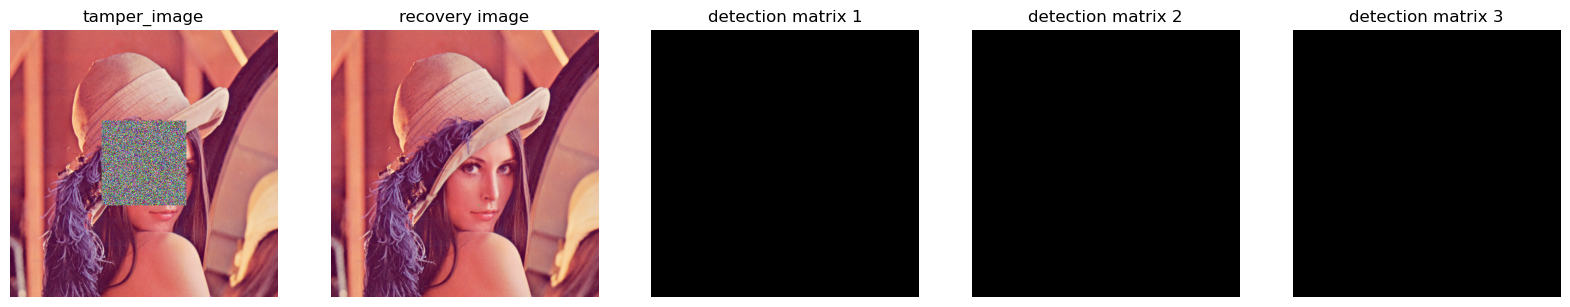

In [11]:
fig, axes = plt.subplots(1, 5,figsize = (20,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()
axes[4].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'recovery image')
axes[2].set_title(f'detection matrix 1')
axes[3].set_title(f'detection matrix 2')
axes[4].set_title(f'detection matrix 3')

axes[0].imshow(cv2.cvtColor(tamper_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(mask1, cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(mask2, cmap=plt.cm.gray,vmax=1,vmin=0)
axes[4].imshow(mask3, cmap=plt.cm.gray,vmax=1,vmin=0)